# Data Preprocessing

## Download & export data tables

### Download Microsoft OHLCV with `yfinance` library

In [2]:
!pip install yfinance
import yfinance as yf



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
ticker = 'MSFT'
df_MSFT = yf.download(ticker)
# Flatten MultiIndex columns
df_MSFT.columns = [col[0] for col in df_MSFT.columns]
df_MSFT

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400
...,...,...,...,...,...
2025-02-28,396.989990,397.630005,386.570007,392.660004,32845700
2025-03-03,388.489990,398.820007,386.160004,398.820007,23007700
2025-03-04,388.609985,392.579987,381.000000,383.399994,29342900


### Download any ticker

**Search for the ticker code**

YFinance: https://finance.yahoo.com/

- [x] Microsoft: MSFT
- [ ] Bitcoin: ???

## Visualize the data with plotly

https://plotly.com/python/candlestick-charts/

In [4]:
import plotly.graph_objects as go

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = df_MSFT

# Debugging: Print updated column names
print(df.columns)

# Create the Candlestick Chart
fig = go.Figure(data=[go.Candlestick(
    x=df.index, 
    open=df["Open"], 
    high=df["High"], 
    low=df["Low"], 
    close=df["Close"],
    name="MSFT"
)])

# Customize layout
fig.update_layout(
    title="Microsoft Stock Price Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    xaxis_rangeslider_visible=False
)

# Show plot
fig.show()

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## Export the data

### Microsoft data

#### To Excel

In [33]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
df_MSFT.to_excel('data/Microsoft_Stock_Price_Historical_Daily.xlsx')

#### To CSV

- Less size in memory

In [8]:
df_MSFT.to_csv('data/Microsoft_Stock_Price_Historical_Daily.csv')

#### Create file path

In [36]:
file_path = f'data/{ticker}.xlsx'
file_path

'data/MSFT.xlsx'

### Load the data

In [9]:
import pandas as pd

df_microsoft = pd.read_excel(
    'data/Microsoft_Stock_Price_Historical_Daily.xlsx',
    parse_dates=['Date'], index_col=0
)

df_microsoft

,Close,High,Low,Open,Volume
Date,,,,,
1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400
...,...,...,...,...,...
2025-02-28,396.989990,397.630005,386.570007,392.660004,32845700
2025-03-03,388.489990,398.820007,386.160004,398.820007,23007700
2025-03-04,388.609985,392.579987,381.000000,383.399994,29342900


## Create new columns

In [10]:
df_microsoft_linkedin= df_microsoft.loc['2016-12-08':,:].copy()

### Tomorrow's percentage change

In [11]:
df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1

### Explanation:
1. **`df_microsoft_linkedin.Close.pct_change(-1)`**  
   - `.pct_change(-1)` calculates the **percentage change** between the current row and the next row (i.e., tomorrow's price relative to today's price).
   - A negative argument `-1` means we are shifting backward, comparing today's close with tomorrow's close.

2. **`* 100`**  
   - Converts the percentage change from a decimal format (e.g., 0.015) to a percentage format (e.g., 1.5%).

3. **`* -1`**  
   - Since `pct_change(-1)` calculates the percentage change from the current row to the next row, multiplying by `-1` ensures that we interpret it as the **expected change for tomorrow** rather than a backward-looking change.

---

### Example Calculation:

| Date       | Close      | `change_tomorrow` Calculation |
|------------|-----------|-----------------------------|
| 2016-12-08 | 55.181129 | `((56.049412 - 55.181129) / 55.181129) * 100 = 1.549137%` |
| 2016-12-09 | 56.049412 | `((56.230301 - 56.049412) / 56.049412) * 100 = 0.321693%` |
| 2016-12-12 | 56.230301 | `((56.962925 - 56.230301) / 56.230301) * 100 = 1.286142%` |
| 2016-12-13 | 56.962925 | **No next row, so `NaN`** |

- The value on `2016-12-08` (1.549137) means that on `2016-12-09`, the stock increased by **1.55%**.
- Similarly, `2016-12-09` saw a **0.32%** increase on `2016-12-12`.

The last row has no future data, so `change_tomorrow` would be `NaN`.


In [40]:
df_microsoft_linkedin

,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2016-12-08,55.181129,55.696675,55.027373,55.443424,21220800,1.549137
2016-12-09,56.049412,56.067501,55.289665,55.334887,27349400,0.321693
2016-12-12,56.230301,56.347882,55.823296,55.913741,20198100,1.286142
2016-12-13,56.962925,57.360886,56.293626,56.528784,35718900,-0.478631
2016-12-14,56.691582,57.388017,56.555911,56.981009,30352700,-0.159803
...,...,...,...,...,...,...
2025-02-27,392.529999,405.739990,392.170013,401.269989,21127400,1.123452
2025-02-28,396.989990,397.630005,386.570007,392.660004,32845700,-2.187959
2025-03-03,388.489990,398.820007,386.160004,398.820007,23007700,0.030878


### Did the stock go up or down?

In [12]:
import numpy as np

In [13]:
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(
    df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')

In [14]:
df_microsoft_linkedin.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      1117
DOWN     954
Name: count, dtype: int64

<Axes: xlabel='Date'>

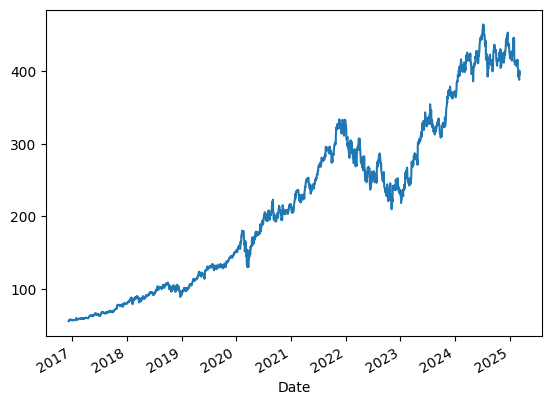

In [15]:
df_microsoft_linkedin.Close.plot()

## Export preprocessed DataFrame into an Excel

In [16]:
df_microsoft_linkedin.to_excel('data/Microsoft_LinkedIn_Processed.xlsx')